In [1]:
import pandas as pd
import numpy as np
import config
import sql_con
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bin import get_bins

In [2]:
# get config module variables
ROOT_DIR = config.ROOT_DIR
select_records = sql_con.select_records
insert_records = sql_con.insert_records
conn_odbc = sql_con.conn_odbc
read_contents = sql_con.read_contents

#### Read sales data and transform before plotting histogram

In [3]:
raw_sales = pd.read_excel(rf"{ROOT_DIR}/data/sales_2018.xlsx")

In [4]:
raw_sales.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [5]:
sales_agg = raw_sales.groupby(by=["account number", "name"], as_index=False)["ext price"].sum()

In [6]:
sales_agg.head()

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


#### Plot ext price's distribution on histogram

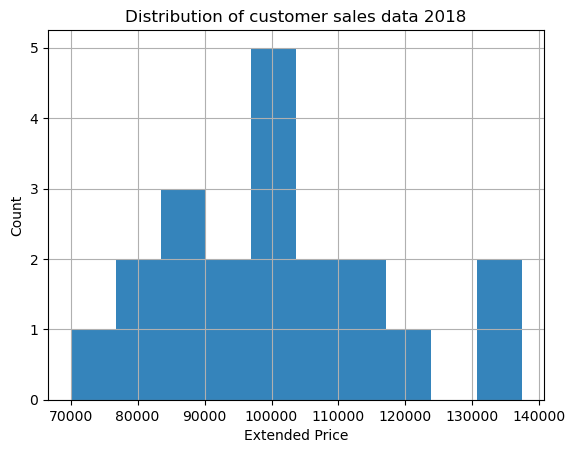

In [7]:
fig, ax = plt.subplots()

ax.hist(
    sales_agg["ext price"],
    alpha=0.9,
    bins=10
)

ax.set_title("Distribution of customer sales data 2018")
ax.set_xlabel("Extended Price")
ax.set_ylabel("Count")
ax.grid(True)

In [8]:
# (array([1., 2., 3., 2., 5., 2., 2., 1., 0., 2.]),
#  array([ 70004.36,  76739.12,  83473.88,  90208.64,  96943.4 , 103678.16,
#         110412.92, 117147.68, 123882.44, 130617.2 , 137351.96]),
#  <BarContainer object of 10 artists>)

In [10]:
get_bins(sales_agg, "ext price", 10)

,bin_num,lower_bound,upper_bound
0,1,70004.36,76739.12
1,2,76739.12,83473.88
2,3,83473.88,90208.64
3,4,90208.64,96943.40
4,5,96943.40,103678.16
5,6,103678.16,110412.92
6,7,110412.92,117147.68
7,8,117147.68,123882.44
8,9,123882.44,130617.20
9,10,130617.20,137351.96
